[['run', '!'], ['run', '!'], ['run', '!'], ['run', '!'], ['run', '.']]
[['filez', '!'], ['cours', '!'], ['fuyez', '!'], ['fuyons', '!'], ['cours', '!']]


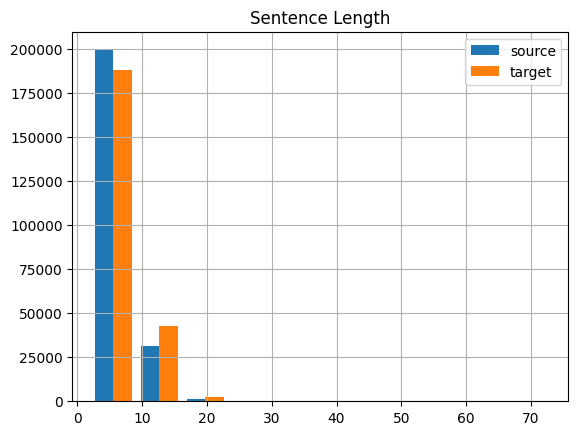

In [1]:
%load_ext autoreload
%autoreload 2

from naml.dataset import Datasets
from naml.dataset.nmt import load_nmt
datasets = Datasets("~/naml-data")
src_words, target_words = load_nmt(datasets, 'fra', 'eng')

print(src_words[10:15], target_words[10:15],sep='\n')

from naml import plot
plot.histogram(
    [[len(x) for x in src_words],[len(x) for x in target_words]],
    legend=['source', 'target'],
    title='Sentence Length',    
)


In [ ]:
from naml.text import Vocabulary, flatten
corpus = flatten(src_words)
vocab = Vocabulary(corpus, min_freq=2)
print(len(vocab))

13108


In [43]:
print(src_words[0])
vocab.truncate_pad(vocab.to_indices(src_words[0]), 10)

['go', '.']


tensor([46,  3,  1,  1,  1,  1,  1,  1,  1,  1])

In [44]:
src_corpus, tgt_corpus = Vocabulary.to_corpus(src_words), Vocabulary.to_corpus(target_words)
src_vocab, tgt_vocab = Vocabulary(src_corpus), Vocabulary(tgt_corpus)
from naml.text import pair_vocab_batch_sample_iter

for x, x_len, y, y_len in pair_vocab_batch_sample_iter(src_vocab, tgt_vocab, src_words, target_words, 2, 8):
    print(x, x_len, y, y_len,sep='\n')
    for i in range(len(x)):
        print(src_vocab.to_tokens(x[i][:x_len[i]]), tgt_vocab.to_tokens(y[i][:y_len[i]]),sep='\n')
    break
    

tensor([[46,  3,  1,  1,  1,  1,  1,  1],
        [46,  3,  1,  1,  1,  1,  1,  1]])
tensor([2, 2])
tensor([[104,  35,   1,   1,   1,   1,   1,   1],
        [804,   3,   1,   1,   1,   1,   1,   1]])
tensor([2, 2])
['go', '.']
['va', '!']
['go', '.']
['marche', '.']
